# Pairwise distance analysis with Plink

In [1]:
## Activate R in jupyter notebook
%load_ext rpy2.ipython

You have already seen one way to visualise genotype data in low dimensions, using smartPCA. We now turn to another method, called MDS and implemented in the software package [Plink](https://zzz.bwh.harvard.edu/plink/).

We will first have to convert the EIGENSTRAT-formatted genotype data that we produced via `trident forge` to Plink format. We can do that using `trident genoconvert`. Open a terminal window in jupyter (up on the left, the button with the plus sign, and then Terminal), and make sure you're in the right environment (e.g. run `conda activate PCA_and_friends`). Then switch to the `session_2` directory via `cd session_2` and then:


In [3]:
!trident genoconvert -d scratch/forged_package --outFormat PLINK

trident v0.21.0 for poseidon v2.4.0
https://poseidon-framework.github.io

Searching POSEIDON.yml files... 1 found
Checking Poseidon versions... 
Initializing packages... 
> 1 
Packages loaded: 1
Converting genotype data in package PCA_package_1 to format PLINK:
The genotype data is already in the requested format



We can now find the PLINK data in the same directory as the EIGENSTRAT data. Check it out by inspecting the file browser in Jupyter, or by running in the terminal:


In [2]:
!ls scratch/forged_package/

PCA_package_1.bed  PCA_package_1.fam   PCA_package_1.janno
PCA_package_1.bib  PCA_package_1.geno  PCA_package_1.snp
PCA_package_1.bim  PCA_package_1.ind   POSEIDON.yml


Where the `.bed`, `.bim` and `.fam` files are used in PLINK. In fact, they are automatically used whenever you use the option `--bfile forged_package/PCA_package` in plink. The first command we're gonna use is for computing pairwise distances of all individuals:


In [5]:
!plink --bfile scratch/forged_package/PCA_package_1 --distance-matrix --out scratch/pairwise_distances

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to scratch/pairwise_distances.log.
Options in effect:
  --bfile scratch/forged_package/PCA_package_1
  --distance-matrix
  --out scratch/pairwise_distances

16384 MB RAM detected; reserving 8192 MB for main workspace.
597573 variants loaded from .bim file.
1666 people (1151 males, 504 females, 11 ambiguous) loaded from .fam.
Ambiguous sex IDs written to scratch/pairwise_distances.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 1666 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
treat these as missing.
Total genotyping rate is 0.994538.
597573 variants and 1666 people pass filte

Now we can do stuff in R. Let's first load the individuals.

In [3]:
%%R
inds <- readr::read_tsv("scratch/pairwise_distances.mdist.id", col_types="cc", col_names=c("Population", "Individual"))
inds

# A tibble: 1,666 × 2
   Population Individual
   <chr>      <chr>     
 1 French     HGDP00511 
 2 French     HGDP00512 
 3 French     HGDP00513 
 4 French     HGDP00514 
 5 French     HGDP00515 
 6 French     HGDP00516 
 7 French     HGDP00517 
 8 French     HGDP00518 
 9 French     HGDP00519 
10 French     HGDP00522 
# … with 1,656 more rows


In [4]:
%%R
dist_mat <- matrix(scan("scratch/pairwise_distances.mdist"), ncol=1666)
dim(dist_mat)

R[write to console]: Read 2775556 items



[1] 1666 1666


We can play a bit with trying to visualizing that massive 1666x1666 matrix, for example using the function `heatmap`:

In [13]:
%%R
?heatmap

File: /var/folders/x3/wy1rjqhn2g9bq4p45mx4sf2w0000gt/T//Rtmpv7SkYe/Rtxt15d1023399753
heatmap                 package:stats                  R Documentation



_D_r_a_w _a _H_e_a_t _M_a_p



_D_e_s_c_r_i_p_t_i_o_n:



     A heat map is a false color image (basically ‘image(t(x))’) with a

     dendrogram added to the left side and to the top.  Typically,

     reordering of the rows and columns according to some set of values

     (row or column means) within the restrictions imposed by the

     dendrogram is carried out.



_U_s_a_g_e:



     heatmap(x, Rowv = NULL, Colv = if(symm)"Rowv" else NULL,

             distfun = dist, hclustfun = hclust,

             reorderfun = function(d, w) reorder(d, w),

             add.expr, symm = FALSE, revC = identical(Colv, "Rowv"),

             scale = c("row", "column", "none"), na.rm = TRUE,

             margins = c(5, 5), ColSideColors, RowSideColors,

             cexRow = 0.2 + 1/log10(nr), cexCol = 0.2 + 1

Let's first try and filter for a few populations:

In [5]:
%%R
unique(inds$Population)

  [1] "French"                    "Druze"                    
  [3] "BedouinB"                  "BedouinA"                 
  [5] "Sardinian"                 "Palestinian"              
  [7] "Cambodian"                 "Japanese"                 
  [9] "Han"                       "Orcadian"                 
 [11] "Surui"                     "Russian"                  
 [13] "Yakut"                     "Karitiana"                
 [15] "Pima"                      "Tujia"                    
 [17] "Italian_North"             "Yi"                       
 [19] "Miao"                      "Oroqen"                   
 [21] "Daur"                      "Mongola"                  
 [23] "Hezhen"                    "Xibo"                     
 [25] "Uyghur"                    "Dai"                      
 [27] "China_Lahu"                "She"                      
 [29] "Naxi"                      "Tu"                       
 [31] "Basque"                    "Adygei"                   
 [33] "E

In [15]:
%%R
indices <- inds$Population %in% c('French', 'Greek', 'Nganasan')
head(indices, 40)

 [1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE


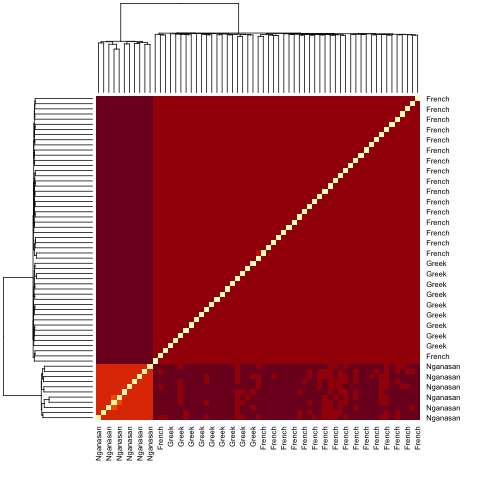

In [16]:
%%R
heatmap(dist_mat[indices,indices], labRow = inds$Population[indices], labCol = inds$Population[indices])


We need to load two libraries:

In [18]:
%%R
library(ggplot2)
library(magrittr) # This is for the pipe operator %>%
mds_coords <- cmdscale(dist_mat)
colnames(mds_coords) <- c("C1", "C2")
mds_coords <- tibble::as_tibble(mds_coords) %>%
    dplyr::bind_cols(inds)
mds_coords

# A tibble: 1,666 × 4
        C1        C2 Population Individual
     <dbl>     <dbl> <chr>      <chr>     
 1 -0.0421 -0.00418  French     HGDP00511 
 2 -0.0408 -0.00281  French     HGDP00512 
 3 -0.0402 -0.00197  French     HGDP00513 
 4 -0.0402 -0.00260  French     HGDP00514 
 5 -0.0410 -0.00132  French     HGDP00515 
 6 -0.0414 -0.00178  French     HGDP00516 
 7 -0.0408 -0.00139  French     HGDP00517 
 8 -0.0406 -0.00166  French     HGDP00518 
 9 -0.0406 -0.00457  French     HGDP00519 
10 -0.0413 -0.000376 French     HGDP00522 
# … with 1,656 more rows


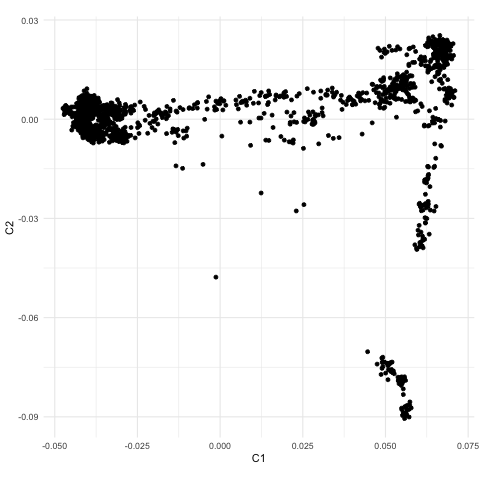

In [19]:
%%R
ggplot(mds_coords) + 
    geom_point(aes(x=C1, y=C2)) +
    theme_minimal() +
    coord_equal()

We can then reorient these coordinates like we did the eigenvectors before.

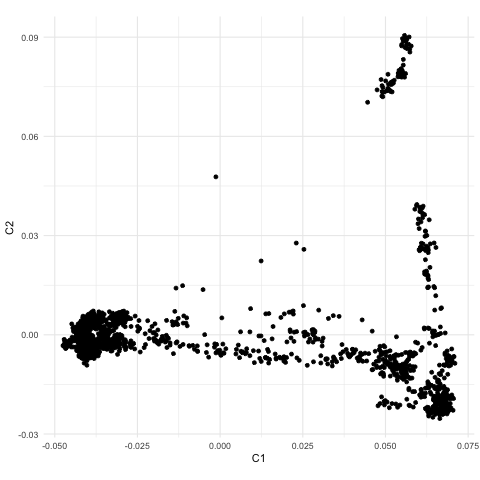

In [21]:
%%R
corner_inds <- mds_coords %>% dplyr::select(Individual, C1, C2) %>% dplyr::filter(Individual %in% c("HGDP00607", "Sir50"))
if (corner_inds$C1[1] > corner_inds$C1[2]) { mds_coords <- mds_coords %>% mutate(C1=-C1)}
if (corner_inds$C2[1] > corner_inds$C2[2]) { mds_coords <- mds_coords %>% mutate(C2=-C2)}

ggplot(mds_coords) + 
    geom_point(aes(x=C1, y=C2)) +
    theme_minimal() +
    coord_equal()

How does MDS compare to PCA if we restrict to the populations in `poplist1`?

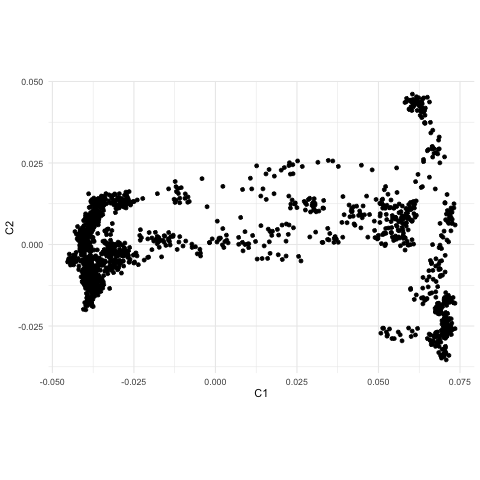

In [46]:
%%R

## Read in the poplist
poplist1 <- readr::read_tsv("PCA_poplists/PCA_poplist1.txt", col_names = "Pops", col_types = 'c')

## Filter distance matrix
indices_pl1 <- inds$Population %in% poplist1$Pops
dist_mat[indices_pl1, indices_pl1]

## Do MDS
mds_coords_pl1 <- cmdscale(dist_mat[indices_pl1,indices_pl1])
colnames(mds_coords_pl1) <- c("C1", "C2")
mds_coords_pl1 <- tibble::as_tibble(mds_coords_pl1) %>%
    dplyr::bind_cols(inds %>% dplyr::filter(inds$Population %in% poplist1$Pops))
mds_coords_pl1


## Reorient
corner_inds_mds1 <- mds_coords_pl1 %>% dplyr::select(Individual, C1, C2) %>% dplyr::filter(Individual %in% c("HGDP00607", "Sir50"))
if (corner_inds_mds1$C1[1] > corner_inds_mds1$C1[2]) { mds_coords_pl1 <- mds_coords_pl1 %>% mutate(C1=-C1)}
if (corner_inds_mds1$C2[1] > corner_inds_mds1$C2[2]) { mds_coords_pl1 <- mds_coords_pl1 %>% mutate(C2=-C2)}

## Plot
ggplot(mds_coords_pl1) + 
    geom_point(aes(x=C1, y=C2)) +
    theme_minimal() +
    coord_equal()